# Homework 7<br><small>Joshua Nasiatka (2016.11.29)</small>

## Problem 1:
This problem uses the data at http://www.census.gov/geo/maps-data/data/gazetteer2010.html and download the data under the header ZIP Code Tabulation Areas. You should download the data, unzip it and it should be called: `Gaz_zcta_national.txt`. *Note: this is a different file then we loaded in class, but it is tab delimited.*

**( a ) Load the data into a DataFrame in julia and make sure that the data types are all correct.**

In [1]:
using DataFrames

In [2]:
census_data=readtable("Gaz_zcta_national.txt",separator='\t',eltypes=[String,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64]);

In [3]:
head(census_data)

,GEOID,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,00601,18570,7744,166659789,799296,64.348,0.309,18.180555,-66.749961
2,00602,41520,18073,79288158,4446273,30.613,1.717,18.362268,-67.17613
3,00603,54689,25653,81880442,183425,31.614,0.071,18.455183,-67.119887
4,00606,6615,2877,109580061,12487,42.309,0.005,18.158345,-66.932911
5,00610,29016,12618,93021467,4172001,35.916,1.611,18.290955,-67.125868
6,00612,67010,30992,175106243,9809163,67.609,3.787,18.402239,-66.7114


**( b ) Find the total population of the U.S. according to this dataset.**

In [4]:
sum(census_data[:POP10])

312462997

**( c ) Find the top 5 zip code areas by population. List the zip codes and the population. Use the internet to look up the cities where the zip codes are.**

In [5]:
head(sort(census_data, cols=:POP10, rev=true))

,GEOID,POP10,HU10,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
1,60629,113916,34000,17639584,161563,6.811,0.062,41.775868,-87.711496
2,79936,111086,35523,69254573,54180,26.739,0.021,31.776593,-106.296976
3,11368,109931,30978,6816707,94491,2.632,0.036,40.749407,-73.85278
4,00926,108862,47317,62575083,1052384,24.16,0.406,18.3454,-66.051545
5,90650,105549,28083,25403321,101814,9.808,0.039,33.906956,-118.08264
6,90011,103892,23547,11100424,529,4.286,0.0,34.00709,-118.258681


```
Cities:
---
1. Chicago,  IL (60629)
2. El Paso,  TX (79936)
3. Corona,   NY (11368)
4. San Juan, PR (00926)
5. Norwalk,  CA (90650)
```

**( d ) Create a new `DataFrame` with 2 columns, the first is the zip code and the 2nd is the population density, which is the population divided by the area (in square miles) within the zip code. List both the top 5 zip codes by density and the cities of the zip codes.**

In [6]:
density = DataFrame(GEOID=census_data[:GEOID], DENSITY=census_data[:POP10]./(census_data[:ALAND_SQMI]+census_data[:AWATER_SQMI]))

,GEOID,DENSITY
1,00601,287.20788159054706
2,00602,1284.2561088772038
3,00603,1726.0217768660248
4,00606,156.3312378881694
5,00610,773.2032936285875
6,00612,938.567987002073
7,00616,950.4788197739626
8,00617,1470.0573750896485
9,00622,264.93708039539825
10,00623,1115.2521302219575


In [7]:
sort(density,cols=:DENSITY,rev=true)

,GEOID,DENSITY
1,20052,156666.66666666666
2,10162,153181.81818181818
3,20390,146000.0
4,10028,143761.1464968153
5,10075,141194.5945945946
6,10128,128350.31847133758
7,10025,125797.87234042553
8,10023,124232.17922606925
9,10021,112741.60206718346
10,10040,111153.84615384616


```
Cities:
---
1. Washington,                DC (20052)
2. New York,                  NY (10162)
3. Washington,                DC (20390)
4. Upper East Side, New York, NY (10028)
5. Upper East Side, New York, NY (10075)
```
I wasn't expecting their to be duplicates in the top 5. And by duplicates I mean same cities but different parts which have their own zip codes.

**( e ) Find the mean longitude and latitude and describe where that lies in the U.S. (Note: most mapping
websites will map a longitude and latitude for you.) This is a way of measuring the center of the U.S.
There are two alternative ways of measuring this.**

In [8]:
LAT = sum(census_data[:INTPTLAT])/length(census_data[:INTPTLAT]);
LON = sum(census_data[:INTPTLONG])/length(census_data[:INTPTLONG]);
print(LAT, ", ", LON)
print("\nWright City, MO")

38.836699805887676, -91.01619304876208
Wright City, MO

Wright City, Missouri is not quite the center of the US

**( f ) Before finding other centers of the U.S., we need to define a weighted mean. In short, a weighted mean is
a mean where not every point has the same weight. For example, if we have the numbers `1, 4, 5, 8, 12`, then
the mean is `6`. However if we have a vector of weights $[1, 3, 3, 1, 4]$, then we consider find the mean of the
numbers `1, 4, 4, 4, 5, 5, 5, 8, 12, 12, 12, 12`, and taking the mean of these is `7`. In mathematical notation, a
weighted mean of the numbers in $x$ with weights w, is $\bar{x}_w = \frac{\sum_i{x_i w_i}}{\sum{w_i}}$ or using julia notation if the vectors `x` and `w` have the same length then the weighted mean is:**

```
sum(x.*w)/sum(w)
```
**Find both the regular mean and the weighted mean of $[1, 3, 5, 7, 9, 11, 13]$ with weights $[1, 2, 1, 2, 1, 2, 3]$**

In [9]:
x = [1,3,5,7,9,11,13]
w = [1,2,1,2,1,2,3]
sum(x.*w)/sum(w)

8.0

**( g ) Find the weighted mean of the longitude and latitude in the dataset taking the total area (land and water) as the weight. Find the town its nearest. This is called the geographical center of the U.S. Note: you can use either the area in meter or square miles. The result will be the same.**

In [10]:
WAREA = (census_data[:ALAND_SQMI]+census_data[:AWATER_SQMI])
WLAT = sum(census_data[:INTPTLAT].*WAREA)/sum(WAREA);
WLONG = sum(census_data[:INTPTLONG].*WAREA)/sum(WAREA);
print(WLAT, ", ", WLONG)

41.014798863612015, -102.1824077415263

Just over the Nebraska border between `Big Springs, Nebraska` and `Julesburg, Colorado`. This is not the same as the previous calculation...

**( h ) Find the weighted mean of the longitude and latitude in the dataset taking the population as the weight. Find the town its nearest. This is called the population center of the U.S.**

In [11]:
WPOP = census_data[:POP10];
WLAT = sum(census_data[:INTPTLAT].*WPOP)/sum(WPOP);
WLONG = sum(census_data[:INTPTLONG].*WPOP)/sum(WPOP);
print(WLAT, ", ", WLONG)

37.28879129758522, -91.78279317090622

Which is just out of Yukon, Missouri.

**( i ) Find the largest and smallest area codes by total land and water area. (Hint: you may need to make a new `DataFrame` with a column of total area.)**

In [12]:
area = DataFrame(GEOID=census_data[:GEOID], TOTAL_AREA=census_data[:ALAND_SQMI].+census_data[:AWATER_SQMI]);
l_area = head(sort(area, cols=:TOTAL_AREA, rev=true));
s_area = head(sort(area, cols=:TOTAL_AREA, rev=false));

In [13]:
l_area

,GEOID,TOTAL_AREA
1,99557,13555.437
2,99519,12890.831
3,99566,9629.971
4,99740,9322.67
5,99756,9066.029
6,99576,8598.048


In [14]:
s_area

,GEOID,TOTAL_AREA
1,10177,0.002
2,82073,0.002
3,00906,0.003
4,10115,0.003
5,10271,0.003
6,11351,0.003


## Problem 2:
Use the Olympic Data from class to answer all of these questions. Load the data and put each column in a proper form. Note: as we saw in class, there are athletes in the data without names or ages. You should not include them in the following calculations. You may either throw out their results or not load them in the dataset to begin with.

Also, for the top 5 listed, if there is a tie for 5th, list all athletes with that value.

In [15]:
oly = readtable("OlympicAthletes_0.csv",separator=',');

Let's scrap the rows with NA Names and Ages

In [16]:
deleterows!(oly,find(isna(oly[:,Symbol("Athlete")])));
deleterows!(oly,find(isna(oly[:,Symbol("Age")])));
#oly[~isna(oly[:,Symbol("Athlete")]),:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Michael Phelps,23,United States,2008,8/24/08,Swimming,8,0,0,8
2,Michael Phelps,19,United States,2004,8/29/04,Swimming,6,0,2,8
3,Michael Phelps,27,United States,2012,8/12/12,Swimming,4,2,0,6
4,Natalie Coughlin,25,United States,2008,8/24/08,Swimming,1,2,3,6
5,Aleksey Nemov,24,Russia,2000,10/1/00,Gymnastics,2,1,3,6
6,Alicia Coutts,24,Australia,2012,8/12/12,Swimming,1,3,1,5
7,Missy Franklin,17,United States,2012,8/12/12,Swimming,4,0,1,5
8,Ryan Lochte,27,United States,2012,8/12/12,Swimming,2,2,1,5
9,Allison Schmitt,22,United States,2012,8/12/12,Swimming,3,1,1,5
10,Natalie Coughlin,21,United States,2004,8/29/04,Swimming,2,2,1,5


In [17]:
head(oly)

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Michael Phelps,23,United States,2008,8/24/08,Swimming,8,0,0,8
2,Michael Phelps,19,United States,2004,8/29/04,Swimming,6,0,2,8
3,Michael Phelps,27,United States,2012,8/12/12,Swimming,4,2,0,6
4,Natalie Coughlin,25,United States,2008,8/24/08,Swimming,1,2,3,6
5,Aleksey Nemov,24,Russia,2000,10/1/00,Gymnastics,2,1,3,6
6,Alicia Coutts,24,Australia,2012,8/12/12,Swimming,1,3,1,5


**( a ) Find the 5 oldest and 5 youngest olympians in the data set and list each participant’s name, age, sport and country. (Note: if there is a tie, list all participant’s in the tie.)**

In [18]:
oldest = sort(oly, cols=:Age, rev=true);
oldest[1:5,:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Ian Millar,61,Canada,2008,8/24/08,Equestrian,0,1,0,1
2,Mark Todd,56,New Zealand,2012,8/12/12,Equestrian,0,0,1,1
3,Mac Cone,55,Canada,2008,8/24/08,Equestrian,0,1,0,1
4,Nick Skelton,54,Great Britain,2012,8/12/12,Equestrian,1,0,0,1
5,Lesley Thompson-Willie,52,Canada,2012,8/12/12,Rowing,0,1,0,1


```
Oldest Olympians:
----
1. Ian Millar
2. Mark Todd
3. Mac Cone
4. Nick Skelton
5. Lesley Thompson-Willie
```

In [19]:
youngest = sort(oly, cols=:Age, rev=false);
youngest[1:5,:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Yang Yilin,15,China,2008,8/24/08,Gymnastics,1,0,2,3
2,Leisel Jones,15,Australia,2000,10/1/00,Swimming,0,2,0,2
3,Go Gi-Hyeon,15,South Korea,2002,2/24/02,Short-Track Speed Skating,1,1,0,2
4,Chen Ruolin,15,China,2008,8/24/08,Diving,2,0,0,2
5,Katie Ledecky,15,United States,2012,8/12/12,Swimming,1,0,0,1


```
Youngest Olympians:
----
1. Yang Yilin
2. Leisel Jones
3. GO Gi-Hyeon
4. Chen Ruolin
5. Katie Ledecky
```

**( b ) Find the mean, median and standard deviation of the ages of the olympians.**

In [20]:
oly_size = size(oly)[1]

8613

In [21]:
# mean
oly_mean_age = sum(oly[:Age])/oly_size

26.405433646812956

In [22]:
oly_middle_index = oly_size/2

4306.5

In [23]:
# median
oly_median_age = (oldest[:Age][4306]+youngest[:Age][4306])/2

26.0

In [24]:
# standard deviation
oly_stddev_age = sqrt((sum(oldest[:Age].-oly_mean_age)^2)/(oly_size-1))

5.880299050258436e-13

**( c ) Plot a histogram of the ages of all olympians.**

In [30]:
using Gadfly

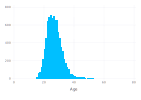

In [31]:
plot(oly,x=:Age,Geom.histogram)

**( d ) Which athlete won the most gold medals in 2000? Most Silver medals in 2004, most bronze medals in 2002?**

In [40]:
# Gold Medal Wins
sort!(oly[oly[:Year] .== 2000,:],cols=[:Gold_Medals],rev=true)[1,:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Ian Thorpe,17,Australia,2000,10/1/00,Swimming,3,2,0,5


In [41]:
# Silver Medal Wins
sort!(oly[oly[:Year] .== 2004,:],cols=[:Silver_Medals],rev=true)[1,:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Natalie Coughlin,21,United States,2004,8/29/04,Swimming,2,2,1,5


In [42]:
# Bronze Medal Wins
sort!(oly[oly[:Year] .== 2002,:],cols=[:Bronze_Medals],rev=true)[1,:]

,Athlete,Age,Country,Year,Closing_Ceremony_Date,Sport,Gold_Medals,Silver_Medals,Bronze_Medals,Total_Medals
1,Felix Gottwald,26,Austria,2002,2/24/02,Nordic Combined,0,0,3,3


**( e ) For this problem, combine the data over all years as we discussed in class. Find the top 5 gold, silver and bronze medal winners over all years in the dataset.**

In [47]:
# Top 5 Gold
total_gold = by(oly,:Athlete) do df # df is dataframe
    DataFrame(Gold_Medals=sum(df[:Gold_Medals]))
end

sort!(total_gold,cols=:Gold_Medals, rev=true)[1:5,:]

,Athlete,Gold_Medals
1,Michael Phelps,18
2,Chris Hoy,6
3,Usain Bolt,6
4,Aaron Peirsol,5
5,Anastasiya Davydova,5


In [48]:
# Top 5 Silver
total_silver = by(oly,:Athlete) do df # df is dataframe
    DataFrame(Silver_Medals=sum(df[:Silver_Medals]))
end

sort!(total_silver,cols=:Silver_Medals, rev=true)[1:5,:]

,Athlete,Silver_Medals
1,Katalin Kovács,5
2,Leisel Jones,5
3,David Cal,4
4,Kara Lynn Joyce,4
5,Kirsty Coventry,4


In [50]:
# Top 5 Bronze
total_bronze = by(oly,:Athlete) do df # df is dataframe
    DataFrame(Bronze_Medals=sum(df[:Bronze_Medals]))
end

sort!(total_bronze,cols=:Bronze_Medals, rev=true)[1:5,:]

,Athlete,Bronze_Medals
1,Natalie Coughlin,5
2,Anja Pärson,4
3,Antje Buschschulte,4
4,Apolo Anton Ohno,4
5,Aino-Kaisa Saarinen,3


**( f ) Combine the data by both Country Name and Year and then sum the total number of medals. Find the top 5 countries by total medals in each of the years 2000 through 2012? Again, if there are ties, list all all countries.**

In [58]:
countries = by(oly[2012 .>= oly[:Year] .>= 2000,:],:Country) do df # df is dataframe
    DataFrame(Total_Medals=sum(df[:Total_Medals]))
end
countries = sort!(countries,cols=[:Total_Medals],rev=true)[1:5,:]

,Country,Total_Medals
1,United States,1312
2,Russia,768
3,Germany,629
4,Australia,609
5,China,530
